In [29]:
import random
import matplotlib.pyplot as plt

## Bernoulli distribution

- Statistical meaning: A discrete probability distribution that gives only two possible results in a trial (aka an experiment).

- Real-life examples: 
    - Flip a coin: the probability of head versus tail
    - Charity asks for donations: the probability of donated versus ignored

- Graphs:
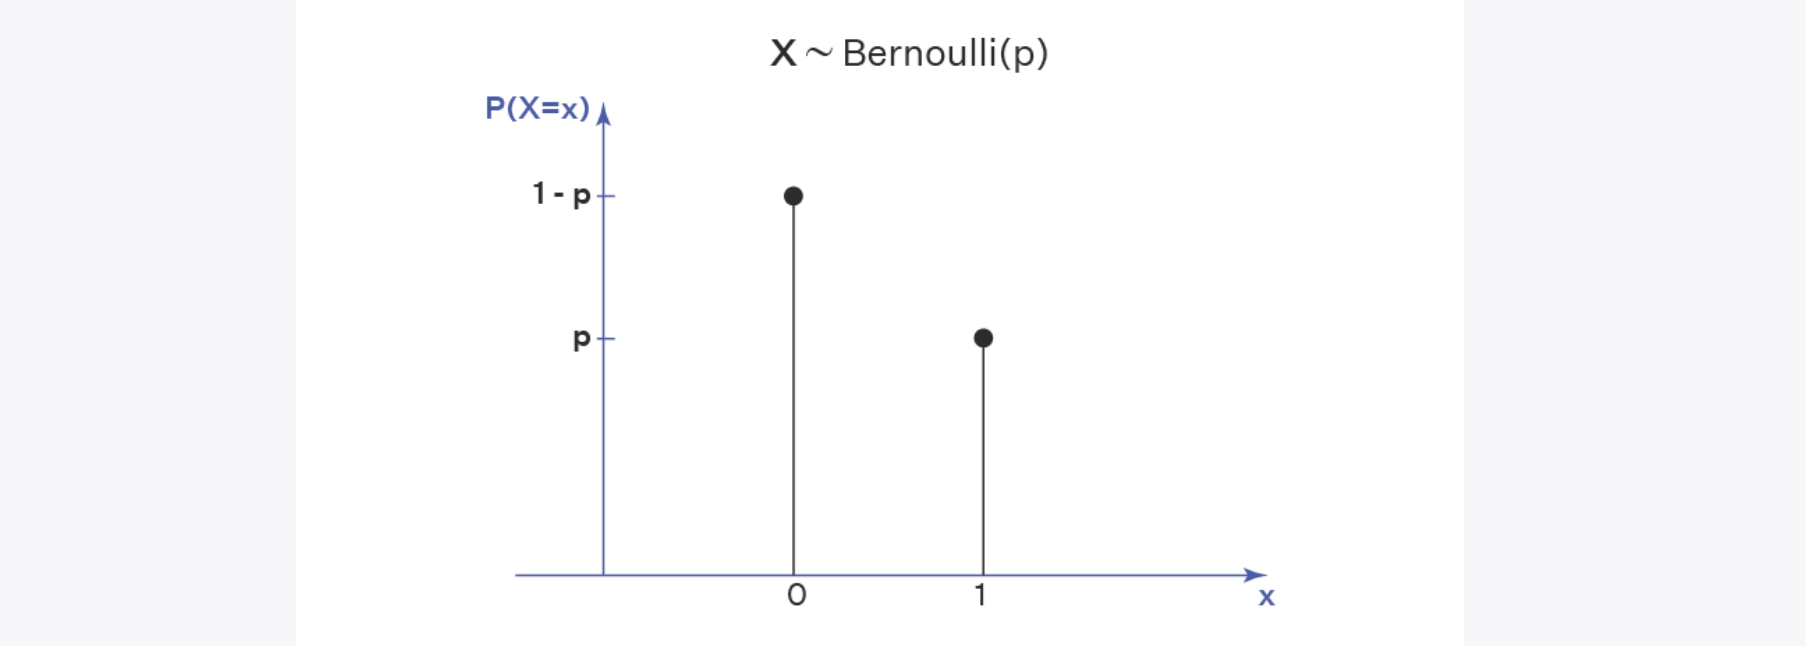

In [36]:
def generate_prn():
    return random.random()

In [37]:
def generate_bernoulli_rv(p, x):
    outputs = []
    prns = []
    
    for i in range(x):
        prn = generate_prn()
        prns.append(prn)
        
        if prn < 1-p:
            outputs.append(0)
        else:
            outputs.append(1)
    
    return outputs, prns

In [59]:
def draw_bernoulli_rv(p, x):
    rv_outputs, prns = generate_bernoulli_rv(p, x)
    
    x_axis = ['0', '1']
    y_axis = [rv_outputs.count(0), rv_outputs.count(1)]
    
    plt.title(label='p = '+str(p)+', x = '+str(x))
    plt.bar(x=x_axis, height=y_axis)

In [54]:
bernoulli_p = 0.2

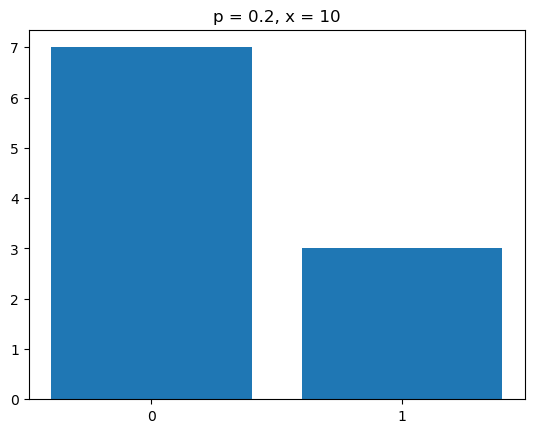

In [60]:
# small sample size
bernoulli_size = 10

draw_bernoulli_rv(p=bernoulli_p, x=bernoulli_size)

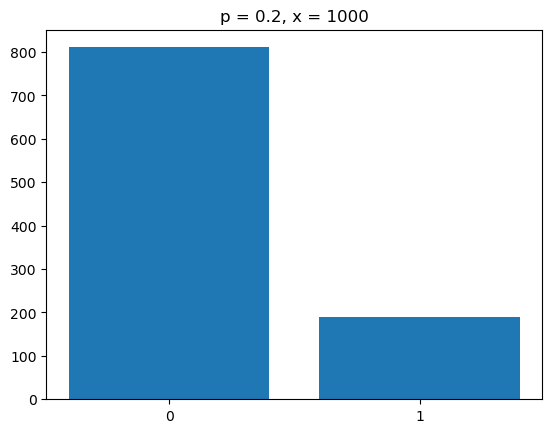

In [61]:
# big sample size
bernoulli_size = 1000

draw_bernoulli_rv(p=bernoulli_p, x=bernoulli_size)

## Binomial distribution

- Statistical meaning: For an experiment (trial) that gives only 'Success' and 'Failure' outcome, the number of ‘Success’ in a sequence of *n* experiments (aka trials).

- Real-life examples: 
    - Flip a coin: the number of heads and tails in X times (aka trial, experiments)  
    - Charity asks for donations: the number donations in a month

- Graphs:
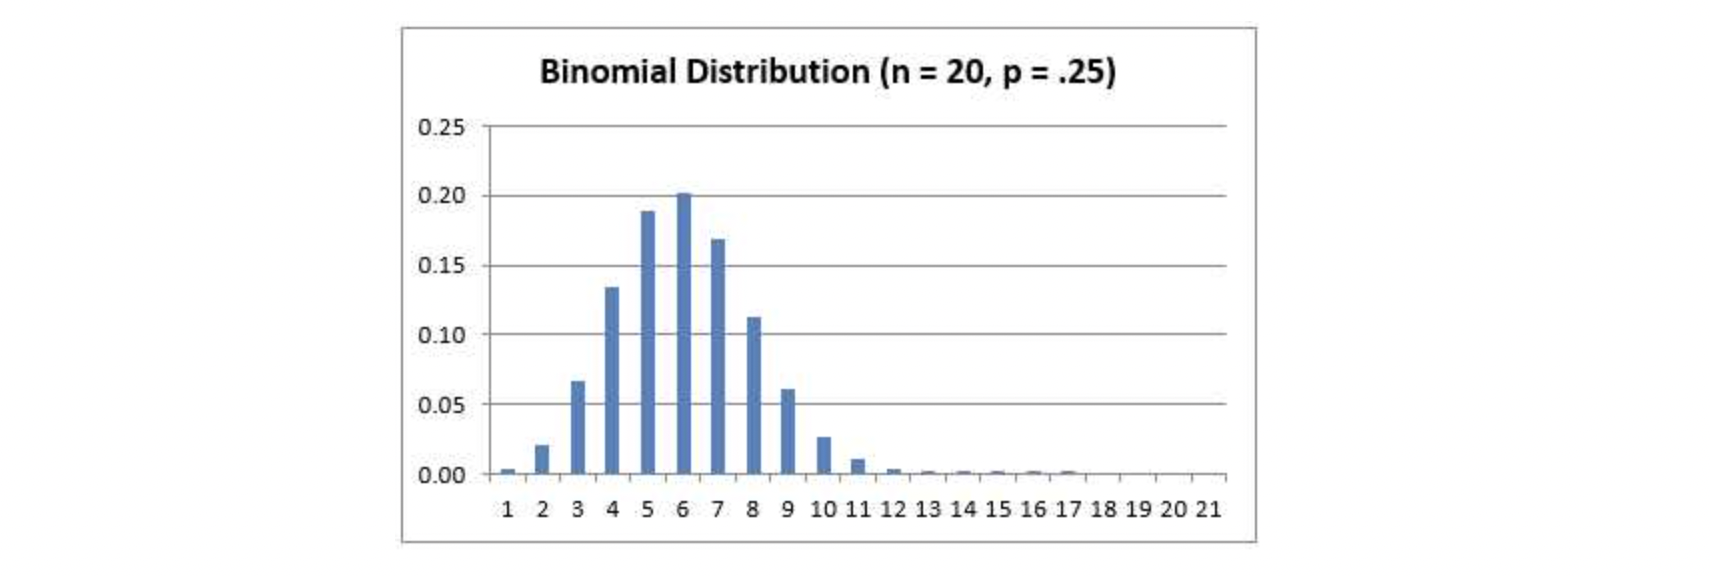

In [111]:
def generate_binomial_rv(p, x):
    outputs = []
    
    for i in range(x):
        # the number of successes and failures out of Bernoulli trials
        bernoulli_output = generate_bernoulli_rv(p, x)[0] 
        # the number of successes (=1)
        outputs.append(bernoulli_output.count(1)) 
        
    return outputs

In [112]:
def draw_binomial_rv(p, x):
    rv_outputs = generate_binomial_rv(p, x)
    
    fig, ax = plt.subplots(1,2)

    ax[0].set_title(label='p = '+str(p)+', x = '+str(x))
    ax[0].set_ylabel('count')
    ax[0].hist(x=rv_outputs)
    
    ax[1].set_title(label='p = '+str(p)+', x = '+str(x))
    ax[1].set_ylabel('probablity')
    values = []
    probs = []
    total_num = len(rv_outputs)
    for i in rv_outputs:
        values.append(i)
        probs.append(rv_outputs.count(i)/total_num)
    ax[1].bar(x=values, height=probs)

In [118]:
binomial_p = 0.7

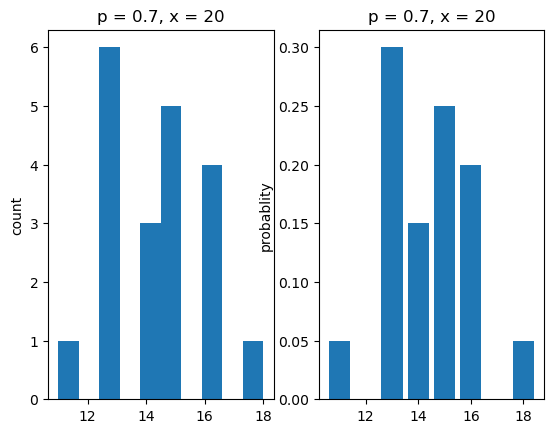

In [125]:
# small sample size
binomial_size = 20

draw_binomial_rv(p=binomial_p, x=binomial_size)

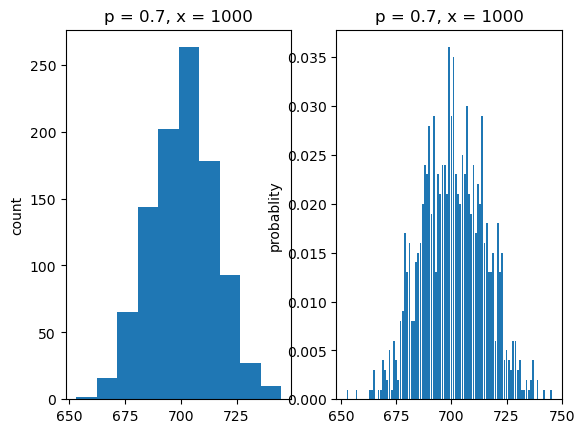

In [126]:
# big sample size
binomial_size = 1000

draw_binomial_rv(p=binomial_p, x=binomial_size)

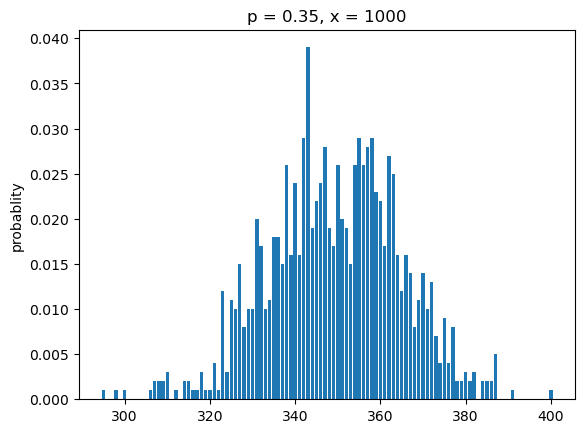

In [91]:
draw_binomial_rv(p=binomial_p, x=binomial_size, y_axis='probability')

## Binomial distribution

- Statistical meaning: For an experiment (trial) that gives only 'Success' and 'Failure' outcome, the number of ‘Success’ in a sequence of *n* experiments (aka trials).

- Real-life examples: 
    - Flip a coin: the number of heads and tails in X times (aka trial, experiments)  
    - Charity asks for donations: the number donations in a month

- Graphs:
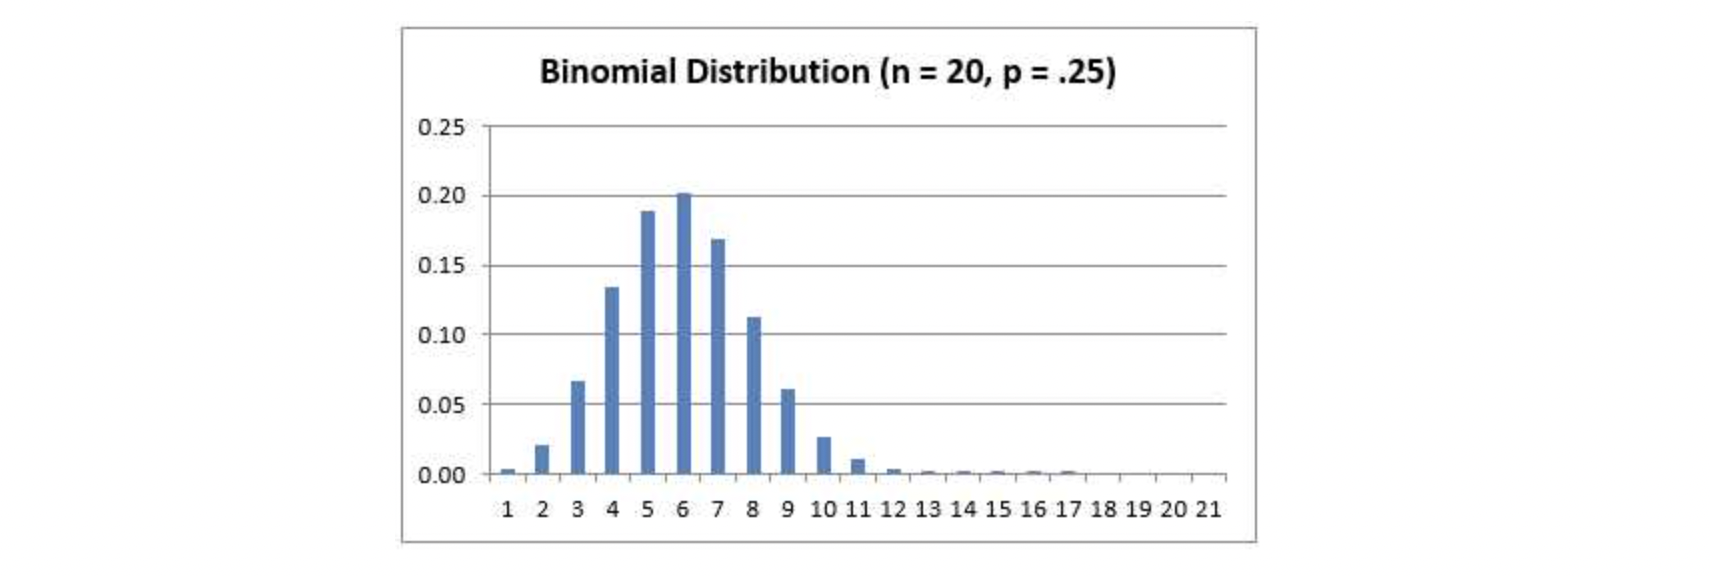

In [111]:
def generate_binomial_rv(p, x):
    outputs = []
    
    for i in range(x):
        # the number of successes and failures out of Bernoulli trials
        bernoulli_output = generate_bernoulli_rv(p, x)[0] 
        # the number of successes (=1)
        outputs.append(bernoulli_output.count(1)) 
        
    return outputs

In [112]:
def draw_binomial_rv(p, x):
    rv_outputs = generate_binomial_rv(p, x)
    
    fig, ax = plt.subplots(1,2)

    ax[0].set_title(label='p = '+str(p)+', x = '+str(x))
    ax[0].set_ylabel('count')
    ax[0].hist(x=rv_outputs)
    
    ax[1].set_title(label='p = '+str(p)+', x = '+str(x))
    ax[1].set_ylabel('probablity')
    values = []
    probs = []
    total_num = len(rv_outputs)
    for i in rv_outputs:
        values.append(i)
        probs.append(rv_outputs.count(i)/total_num)
    ax[1].bar(x=values, height=probs)

In [118]:
binomial_p = 0.7

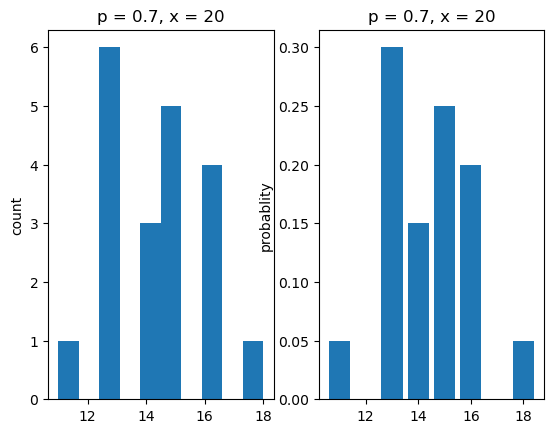

In [125]:
# small sample size
binomial_size = 20

draw_binomial_rv(p=binomial_p, x=binomial_size)

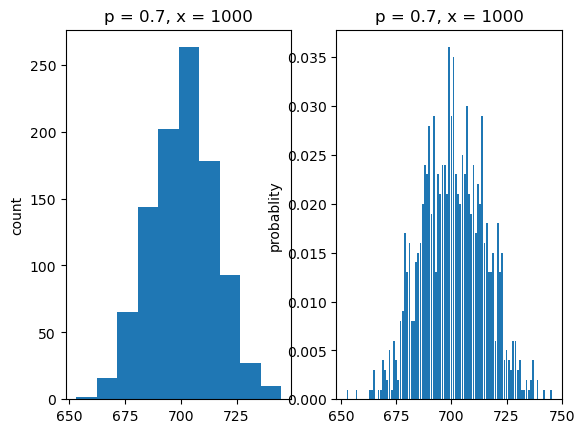

In [126]:
# big sample size
binomial_size = 1000

draw_binomial_rv(p=binomial_p, x=binomial_size)